# COMP 432 - Artificial Intelligence
# Assigment 1

## Task 2 : Drug Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

### Question 2

In [2]:
data = pd.read_csv('drug200.csv')
print(data)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


### Question 3

In [3]:
classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
distrib = {c: data['Drug'].value_counts()[c] for c in classes}
print(distrib)

{'drugA': 23, 'drugB': 16, 'drugC': 16, 'drugX': 54, 'drugY': 91}


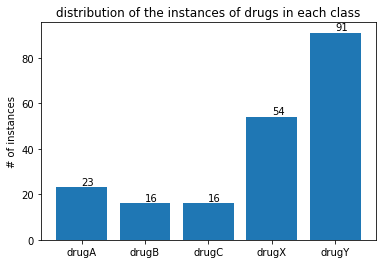

In [4]:
t = np.arange(len(distrib))
plt.bar(t,distrib.values(),align='center')
plt.xticks(t,list(distrib.keys()))
for index,data_plot in enumerate(list(distrib.values())):
    plt.text(x=index , y =data_plot+1 , s=f"{data_plot}" , fontdict=dict(fontsize=10))
plt.title('distribution of the instances of drugs in each class')
plt.ylabel('# of instances')
plt.savefig('drug-distribution.pdf')
plt.show()

### Question 4

In [5]:
dum = pd.get_dummies(data)

In [6]:
dum

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,25.355,1,0,1,0,0,1,0,0,0,0,0,1
1,47,13.093,0,1,0,1,0,1,0,0,0,1,0,0
2,47,10.114,0,1,0,1,0,1,0,0,0,1,0,0
3,28,7.798,1,0,0,0,1,1,0,0,0,0,1,0
4,61,18.043,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,0,0,1,0,0
196,16,12.006,0,1,0,1,0,1,0,0,0,1,0,0
197,52,9.894,0,1,0,0,1,1,0,0,0,0,1,0
198,23,14.020,0,1,0,0,1,0,1,0,0,0,1,0


In [7]:
Y = data['Drug']
X = dum[dum.columns.values[0:9]]


### Question 5

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

### Question 6

#### a)

In [9]:
nb_class = MultinomialNB()
nb_class.fit(X_train, Y_train)

MultinomialNB()

In [10]:
Y_nb_pred = nb_class.predict(X_test)
score_nb = nb_class.score(X_test, Y_test)
print('accuracy multinomial Naive Bayes Classifier : {:f}%'.format(score_nb*100))

accuracy multinomial Naive Bayes Classifier : 66.000000%


#### b)

In [11]:
base_dt_class = DecisionTreeClassifier()
base_dt_class.fit(X_train, Y_train)

DecisionTreeClassifier()

In [12]:
Y_base_dt_pred = base_dt_class.predict(X_test)
score_base_dt = base_dt_class.score(X_test, Y_test)
print('accuracy basic Decision Tree Classifier : {:f}%'.format(score_base_dt*100))

accuracy basic Decision Tree Classifier : 100.000000%


#### c)

In [13]:
top_dt_class = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,8],
    'min_samples_split': [1,2,3],
}
top_dt_class = GridSearchCV(top_dt_class,param_grid=parameters)
top_dt_class.fit(X_train, Y_train)
print(top_dt_class.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


In [14]:
Y_top_dt_pred = top_dt_class.predict(X_test)
score_top_dt = top_dt_class.score(X_test, Y_test)
print('accuracy Top Decision Tree Classifier : {:f}%'.format(score_top_dt*100))

accuracy Top Decision Tree Classifier : 100.000000%


In [15]:
print(top_dt_class.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


#### d)

In [16]:
per_class = Perceptron()
per_class.fit(X_train, Y_train)

Perceptron()

In [17]:
Y_per_pred = per_class.predict(X_test)
score_per = per_class.score(X_test, Y_test)
print('accuracy Perceptron Classifier : {:f}%'.format(score_per*100))

accuracy Perceptron Classifier : 40.000000%


#### e)

In [18]:
mlp_class = MLPClassifier(activation = 'logistic', solver='sgd')
mlp_class.fit(X_train, Y_train)

MLPClassifier(activation='logistic', solver='sgd')

In [19]:
Y_mlp_pred = mlp_class.predict(X_test)
score_mlp = mlp_class.score(X_test, Y_test)
print('accuracy MulitLayer Perceptron Classifier : {:f}%'.format(score_mlp*100))

accuracy MulitLayer Perceptron Classifier : 52.000000%


#### f)

In [20]:
top_mlp_class = MLPClassifier()
parameters = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'solver': ['adam', 'sgd'],
}
top_mlp_class = GridSearchCV(top_mlp_class, param_grid=parameters)
top_mlp_class.fit(X_train, Y_train)
    
    

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu', 'identity'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

In [21]:
Y_top_mlp_pred = top_mlp_class.predict(X_test)
score_top_mlp = top_mlp_class.score(X_test, Y_test)
print('accuracy MulitLayer Perceptron Classifier : {:f}%'.format(score_top_mlp*100))

accuracy MulitLayer Perceptron Classifier : 90.000000%


In [22]:
print(top_mlp_class.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


### Question 7

[Text(0, 0.5, 'drugA'),
 Text(0, 1.5, 'drugB'),
 Text(0, 2.5, 'drugC'),
 Text(0, 3.5, 'drugX'),
 Text(0, 4.5, 'drugY')]

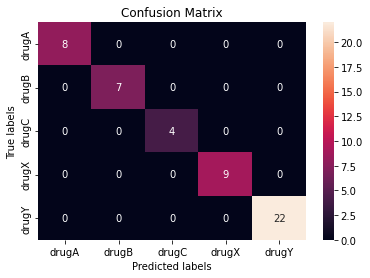

In [23]:
cm = confusion_matrix(Y_test,Y_base_dt_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)

In [24]:
def save(y_true, y_pred, title,gridsearch=None):
    header = '\n\n\n---------------- '+title+' ----------------\n'
    if gridsearch:
        header += '\t\tBest parameters found by GridSearchCv :\n'
        for cat,val in gridsearch.items():
            header += cat+': '+str(val)+' ; '
        header+='\n'
    print(header)
    
    questb = "\nb) Confusion matrix\n"
    print(questb)
    Lcl = ['drA','drB','drC','drX','drY',]
    cm = confusion_matrix(y_true, y_pred)
    cm_f = 'axis : x-> Predicted labels; y-> True labels\n\n'
    cm_f+= '|drA|drB|drC|drX|drY|\n'
    cm_f+= '---------------------\n'
    for i in range(cm.shape[0]):
        cm_f += '|{:<3s}|{:<3s}|{:<3s}|{:<3s}|{:<3s}|{:<3}\n'.format(str(cm[i,0]),str(cm[i,1]),str(cm[i,2]),str(cm[i,3]),str(cm[i,4]),Lcl[i])
    print(cm_f)
    questb += cm_f
     
    questc = "\nc) Precision, recall, and F1-measure\n"
    print(questc)
    report = classification_report(y_true, y_pred,output_dict=True)
    rep = "             | precision |  recall  | f1-score |\n"
    for c in classes:
        rep+="{:<13s}|{:<11.8s}|{:<10.8s}|{:<10.8s}|\n".format(c,str(report[c]['precision']),str(report[c]['recall']),str(report[c]['f1-score']))
    print(rep)
    questc+="\n"+rep
    
    questd = "\n\nd) Accuracy, macro-average F1 and weighted-average F1 of the model\n"
    print(questd)
    acc = accuracy_score(y_true, y_pred)
    print('Accuracy                  : ',acc)
    questd += f"Accuracy                  : {acc}\n"
    
    f1_sc_mac = f1_score(y_true, y_pred, average='macro')
    print('Macro-average F1-score    : ', f1_sc_mac)
    questd += f"Macro-average F1-score    : {f1_sc_mac}\n"
    
    f1_sc_wei = f1_score(y_true, y_pred, average='weighted')
    print('Weighted-average F1-score : ',f1_sc_wei)
    questd += f"Weighted-average F1-score : {f1_sc_wei}\n\n"
    
    string = header
    string+= questb
    string+= questc
    string+= questd
    
    return string
    


string = save(Y_test,Y_top_mlp_pred,'Top Multi Layer Perceptron classifier',top_mlp_class.best_params_)
#save(Y_test,Y_base_dt_pred,'Top Multi Layer Perceptron classifier',top_mlp_class.best_params_)




---------------- Top Multi Layer Perceptron classifier ----------------
		Best parameters found by GridSearchCv :
activation: tanh ; hidden_layer_sizes: (30, 50) ; solver: adam ; 


b) Confusion matrix

axis : x-> Predicted labels; y-> True labels

|drA|drB|drC|drX|drY|
---------------------
|8  |0  |0  |0  |0  |drA
|4  |3  |0  |0  |0  |drB
|0  |0  |3  |1  |0  |drC
|0  |0  |0  |9  |0  |drX
|0  |0  |0  |0  |22 |drY


c) Precision, recall, and F1-measure

             | precision |  recall  | f1-score |
drugA        |0.666666   |1.0       |0.8       |
drugB        |1.0        |0.428571  |0.6       |
drugC        |1.0        |0.75      |0.857142  |
drugX        |0.9        |1.0       |0.947368  |
drugY        |1.0        |1.0       |1.0       |



d) Accuracy, macro-average F1 and weighted-average F1 of the model

Accuracy                  :  0.9
Macro-average F1-score    :  0.8409022556390978
Weighted-average F1-score :  0.8910977443609024


In [25]:
nb_str = save(Y_test,Y_nb_pred,'Gaussian Naive Bayes Classifier')
base_dt_str = save(Y_test,Y_base_dt_pred,'Decision tree Classifier')
top_dt_str = save(Y_test,Y_top_dt_pred,'Top Decision tree Classifier', top_dt_class.best_params_)
per_str = save(Y_test,Y_per_pred,'Perceptron Classifier')
base_mlp_str = save(Y_test,Y_mlp_pred,'Multi Layer Perceptron Classifier')
top_mlp_str = save(Y_test,Y_top_mlp_pred,'Top Multi Layer Perceptron classifier',top_mlp_class.best_params_)




---------------- Gaussian Naive Bayes Classifier ----------------


b) Confusion matrix

axis : x-> Predicted labels; y-> True labels

|drA|drB|drC|drX|drY|
---------------------
|3  |1  |0  |0  |4  |drA
|2  |5  |0  |0  |0  |drB
|0  |0  |1  |2  |1  |drC
|0  |0  |0  |6  |3  |drX
|1  |0  |0  |3  |18 |drY


c) Precision, recall, and F1-measure

             | precision |  recall  | f1-score |
drugA        |0.5        |0.375     |0.428571  |
drugB        |0.833333   |0.714285  |0.769230  |
drugC        |1.0        |0.25      |0.4       |
drugX        |0.545454   |0.666666  |0.6       |
drugY        |0.692307   |0.818181  |0.750000  |



d) Accuracy, macro-average F1 and weighted-average F1 of the model

Accuracy                  :  0.66
Macro-average F1-score    :  0.5895604395604396
Weighted-average F1-score :  0.6462637362637363



---------------- Decision tree Classifier ----------------


b) Confusion matrix

axis : x-> Predicted labels; y-> True labels

|drA|drB|drC|drX|drY|
-----

In [26]:
f = open("drug-performance.txt", "w")
f.write(nb_str)
f.write(base_dt_str)
f.write(top_dt_str)
f.write(per_str)
f.write(base_mlp_str)
f.write(top_mlp_str)
f.close()

### Question 8

In [27]:
metrics = ['accuracy','macro-average F1','weighted-average F1']
models = ['nb','base_dt','top_dt','per','base_mlp','top_mlp']
dict_perforamances = {met:{mod:[] for mod in models} for met in metrics}


parameters_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,8],
    'min_samples_split': [1,2,3],
}

parameters_mlp = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'solver': ['adam', 'sgd'],
}

L_models = [MultinomialNB(),
            DecisionTreeClassifier(),
            GridSearchCV(DecisionTreeClassifier(),param_grid=parameters_dt),
            Perceptron(),
            MLPClassifier(activation = 'logistic', solver='sgd'),
            GridSearchCV(MLPClassifier(), param_grid=parameters_mlp)]

for idx, model in enumerate(L_models):
    for i in range(10):
        clf = model
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        acc = accuracy_score(Y_test, Y_pred)
        f1_sc_mac = f1_score(Y_test, Y_pred, average='macro')
        f1_sc_wei = f1_score(Y_test, Y_pred, average='weighted')
        dict_perforamances['accuracy'][models[idx]].append(acc)
        dict_perforamances['macro-average F1'][models[idx]].append(f1_sc_mac)
        dict_perforamances['weighted-average F1'][models[idx]].append(f1_sc_wei)
                                               

    
    

In [28]:
def standard_deviation(l):
    mean = sum(l)/len(l)
    s = 0 
    for v in l:
        s+=(v-mean)**2
    std_dev = np.sqrt((1/len(l))*s)
    return std_dev

In [29]:
dict_average = {met:{mod:(sum(dict_perforamances[met][mod])/10) for mod in models} for met in metrics}
avg = "\n\n\nAverage accuracy, macro-average F1 score and weighted-average F1 score on 10 different runs\n\n"
avg += "        | accuracy | mac-avg F1 | wgh-avg F1 |\n"
for m in models:
    avg+="{:<8s}|{:<10.8s}|{:<12.8s}|{:<12.8s}|\n".format(m,str(dict_average['accuracy'][m]),str(dict_average['macro-average F1'][m]),str(dict_average['weighted-average F1'][m]))
print(avg)


dict_std_dev = {met:{mod:(standard_deviation(dict_perforamances[met][mod])) for mod in models} for met in metrics}
dev = "\n\nStandard deviation accuracy, macro-average F1 score and weighted-average F1 score on 10 different runs\n\n"
dev += "        | accuracy | mac-avg F1 | wgh-avg F1 |\n"
for m in models:
    dev+="{:<8s}|{:<10.8s}|{:<12.8s}|{:<12.8s}|\n".format(m,str(dict_std_dev['accuracy'][m]),str(dict_std_dev['macro-average F1'][m]),str(dict_std_dev['weighted-average F1'][m]))
print(dev)

f = open("drug-performance.txt", "a")
f.write(avg)
f.write(dev)
f.close()




Average accuracy, macro-average F1 score and weighted-average F1 score on 10 different runs

        | accuracy | mac-avg F1 | wgh-avg F1 |
nb      |0.66      |0.589560    |0.646263    |
base_dt |1.0       |1.0         |1.0         |
top_dt  |1.0       |1.0         |1.0         |
per     |0.399999  |0.199999    |0.353333    |
base_mlp|0.518     |0.228261    |0.401879    |
top_mlp |0.880000  |0.840591    |0.867487    |



Standard deviation accuracy, macro-average F1 score and weighted-average F1 score on 10 different runs

        | accuracy | mac-avg F1 | wgh-avg F1 |
nb      |0.0       |1.110223    |0.0         |
base_dt |0.0       |0.0         |0.0         |
top_dt  |0.0       |0.0         |0.0         |
per     |5.551115  |2.775557    |5.551115    |
base_mlp|0.006000  |0.004745    |0.006285    |
top_mlp |0.054405  |0.111439    |0.067544    |

